In [1]:
# 필요한 package 불러오기
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import matplotlib.axis as ax
import statistics

In [2]:
!git clone https://github.com/yun-seon/DX-Training-Hyundai-0707.git

Cloning into 'DX-Training-Hyundai-0707'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 21 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


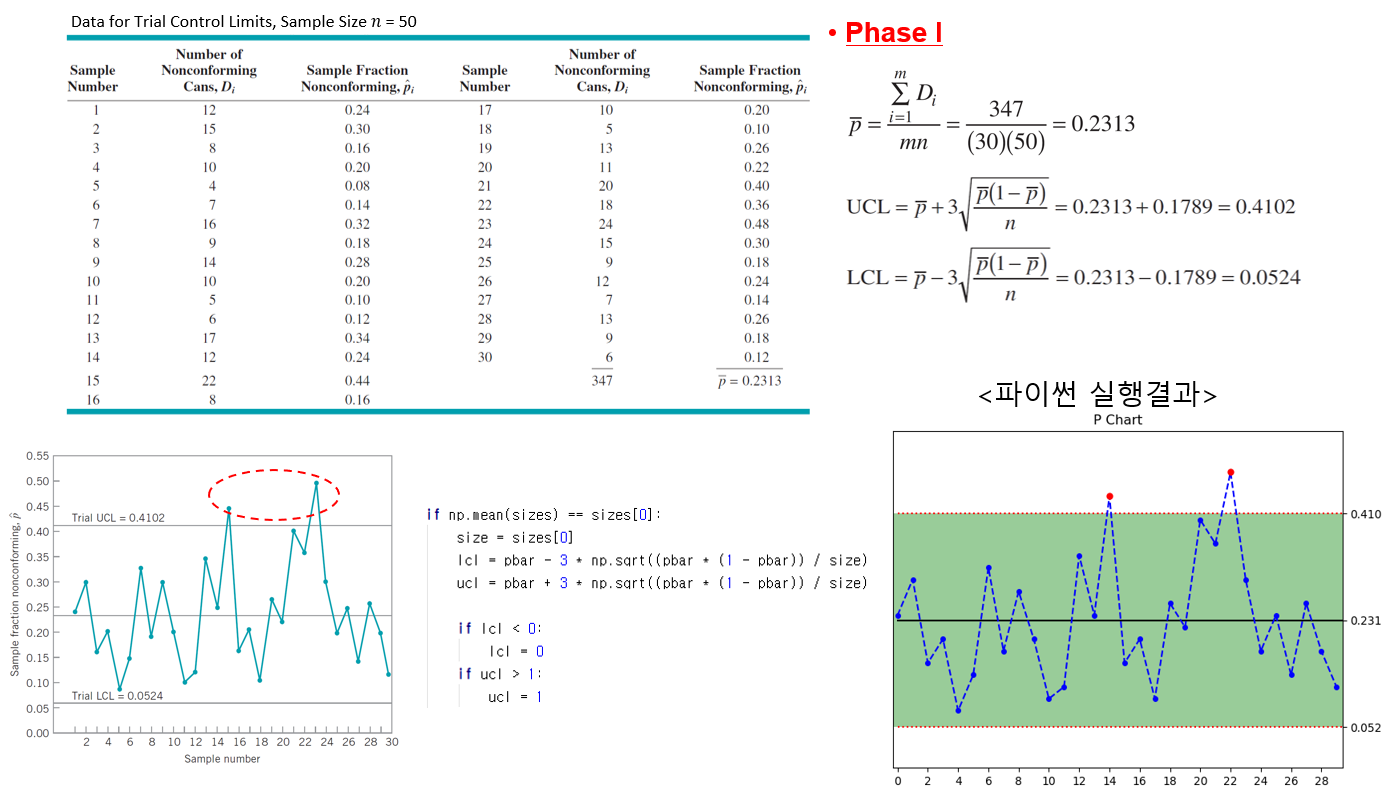

## Example Data 활용하여 different sample size에 대한 "p chart" 구축

In [17]:
# data 불러오기

ex = pd.read_csv("/content/DX-Training-Hyundai-0707/Data/example_p_chart_different_size.csv")
data = ex   
data.head()

,sample,value
0,100,12
1,80,8
2,80,6
3,100,9
4,110,10


In [18]:
# dataframe 형태를 변환

if isinstance(data, pd.DataFrame):
    data = data.values
data[:6]

array([[100,  12],
       [ 80,   8],
       [ 80,   6],
       [100,   9],
       [110,  10],
       [110,  12]])

In [19]:
# p chart 구성을 위한 setting 값 설정

title_ = "p chart"
plt.style.use('grayscale')
mpl.rcParams['lines.markersize'] = 4

size = len(data[0]) 
layers = []
points = None
summary = []
size = size-1

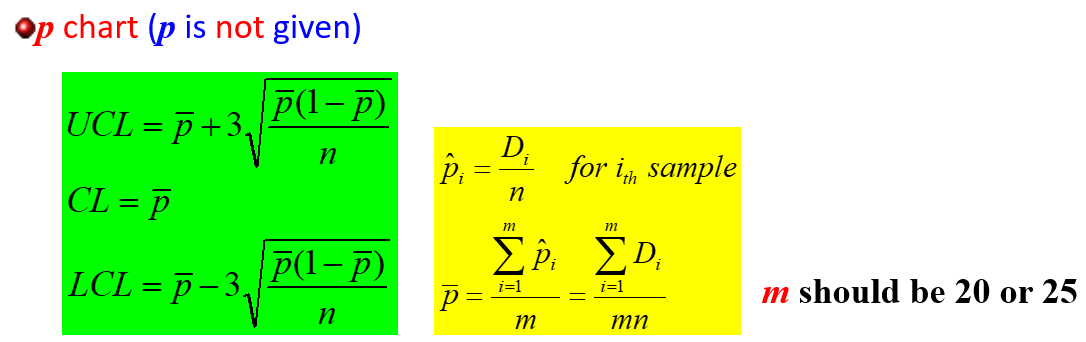

In [25]:
# Control Chart plotting 함수
def plot(data, size, newdata=None):

    data = data.T

    data2 = data / sizes 
    pbar = np.mean(data2)
   
    lcl_lst, ucl_lst = [], []
    for size in sizes:

        ucl = (pbar + 3 * np.sqrt((pbar * (1 - pbar)) / size))
        lcl = (pbar - 3 * np.sqrt((pbar * (1 - pbar)) / size))
        
        if ucl > 1:
            ucl_lst.append(1)
        else:
            ucl_lst.append(ucl)
            
        if lcl < 0:
            lcl_lst.append(0)
        else:
            lcl_lst.append(lcl)

    return (data2, pbar, lcl_lst, ucl_lst, title_)

In [21]:
# 데이터 값 구분에 따른 빈도수로 표현

size = size - 1
sizes, data = data.T

print("size: \n", sizes)
print("data: \n", data)

size: 
 [100  80  80 100 110 110 100 100  90  90 110 120 120 120 110  80  80  80
  90 100 100 100 100  90  90]
data: 
 [12  8  6  9 10 12 11 16 10  6 20 15  9  8  6  8 10  7  5  8  5  8 10  6
  9]


In [22]:
# 데이터를 비율(=값/빈도수)로 표현

data2 = data / sizes # p_hat
pbar = np.mean(data2)

print("prob data: \n", data2)
print("pbar: ", pbar)
print("mean of sizes: ", np.mean(sizes))

prob data: 
 [0.12       0.1        0.075      0.09       0.09090909 0.10909091
 0.11       0.16       0.11111111 0.06666667 0.18181818 0.125
 0.075      0.06666667 0.05454545 0.1        0.125      0.0875
 0.05555556 0.08       0.05       0.08       0.1        0.06666667
 0.1       ]
pbar:  0.09522121212121211
mean of sizes:  98.0


In [23]:
# Sample size에 따른 UCL, LCL 변화 확인

lcl, ucl = [], []
for size in sizes:
    lcl.append(pbar - 3 * np.sqrt((pbar * (1 - pbar)) / size))
    ucl.append(pbar + 3 * np.sqrt((pbar * (1 - pbar)) / size))

print("size: ", size)
print("LCL: \n: ", lcl) # different sample size에 대한 LCL
print("UCL: \n", ucl) # differnent sample size에 대한 UCL

size:  90
LCL: 
:  [0.007165139306759785, -0.0032284702011812078, -0.0032284702011812078, 0.007165139306759785, 0.011263040936745974, 0.011263040936745974, 0.007165139306759785, 0.007165139306759785, 0.0024019614867778483, 0.0024019614867778483, 0.011263040936745974, 0.014837383111557162, 0.014837383111557162, 0.014837383111557162, 0.011263040936745974, -0.0032284702011812078, -0.0032284702011812078, -0.0032284702011812078, 0.0024019614867778483, 0.007165139306759785, 0.007165139306759785, 0.007165139306759785, 0.007165139306759785, 0.0024019614867778483, 0.0024019614867778483]
UCL: 
 [0.18327728493566442, 0.1936708944436054, 0.1936708944436054, 0.18327728493566442, 0.17917938330567823, 0.17917938330567823, 0.18327728493566442, 0.18327728493566442, 0.18804046275564637, 0.18804046275564637, 0.17917938330567823, 0.17560504113086706, 0.17560504113086706, 0.17560504113086706, 0.17917938330567823, 0.1936708944436054, 0.1936708944436054, 0.1936708944436054, 0.18804046275564637, 0.18327728493

In [26]:
# 상기 과정을 plot 함수 통해 적용

result= plot(data, sizes, newdata=None)
data2 = result[0]
pbar = result[1]
lcl = result[2]
ucl = result[3]
title = _title = result[4]

print("prob data: \n", data2)
print("pbar: ", pbar)
print("Lower control limit (LCL): ", lcl)
print("Upper control limit (UCL): ", ucl)
print("Chart title: ", title_)

prob data: 
 [0.12       0.1        0.075      0.09       0.09090909 0.10909091
 0.11       0.16       0.11111111 0.06666667 0.18181818 0.125
 0.075      0.06666667 0.05454545 0.1        0.125      0.0875
 0.05555556 0.08       0.05       0.08       0.1        0.06666667
 0.1       ]
pbar:  0.09522121212121211
Lower control limit (LCL):  [0.007165139306759785, 0, 0, 0.007165139306759785, 0.011263040936745974, 0.011263040936745974, 0.007165139306759785, 0.007165139306759785, 0.0024019614867778483, 0.0024019614867778483, 0.011263040936745974, 0.014837383111557162, 0.014837383111557162, 0.014837383111557162, 0.011263040936745974, 0, 0, 0, 0.0024019614867778483, 0.007165139306759785, 0.007165139306759785, 0.007165139306759785, 0.007165139306759785, 0.0024019614867778483, 0.0024019614867778483]
Upper control limit (UCL):  [0.18327728493566442, 0.1936708944436054, 0.1936708944436054, 0.18327728493566442, 0.17917938330567823, 0.17917938330567823, 0.18327728493566442, 0.18327728493566442, 0.18

In [27]:
values = data2 # p_hat
center = pbar # Control Limit (CL) : p bar

num = len(data2)
if isinstance(data2[0], list):
    num = len(data2[0])

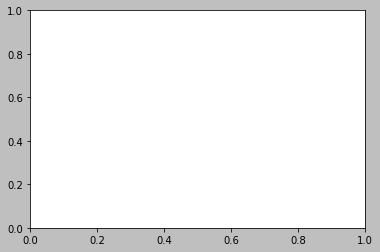

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # suplot 추가 가능
#ax.yaxis.tick_right() # 축을 오른쪽에 표현하고자 할 때, 사용 가능

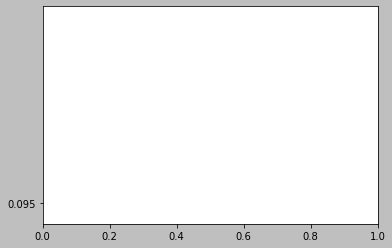

In [29]:
ax.yaxis.set_ticks([center]) # CL (p bar) 값 표현
fig

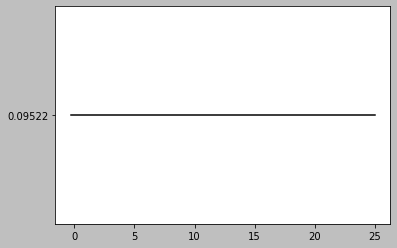

In [30]:
ax.plot([-0.3, num], [center, center], 'k-') # CL (p bar) 값 표현
fig

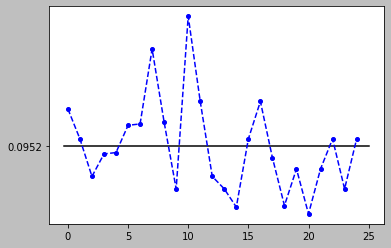

In [31]:
ax.plot(values, 'bo--') # 측정값을 파란색으로 plotting
fig

In [32]:
newx = list(range(num))
newx[0] = -0.3
newx[-1] = num - 0.6

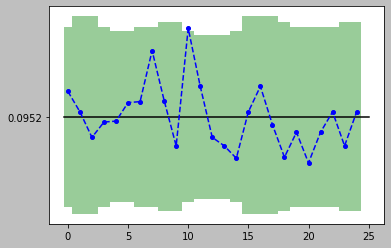

In [33]:
ax.fill_between(newx, lcl, ucl, facecolor='green', alpha=0.4, step='mid') # UCL, LCL의 영역을 표현하도록 설정
fig 

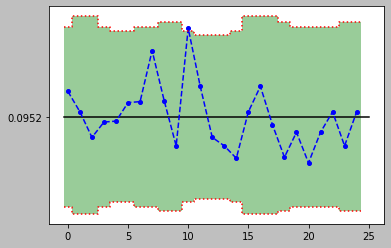

In [34]:
# UCL, LCL 붉은 점선을 표현하도록 설정
ax.step(newx, lcl, 'r:', where='mid')
ax.step(newx, ucl, 'r:', where='mid')
fig